# **Preprocessing Data**

In [1]:
import pandas as pd

data = pd.read_csv("final_labeled_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      4139 non-null   object
 1   author        4139 non-null   object
 2   comment       4138 non-null   object
 3   label         4139 non-null   int64 
 4   label_source  4139 non-null   object
dtypes: int64(1), object(4)
memory usage: 161.8+ KB


In [2]:
data.head(10)

,video_id,author,comment,label,label_source
0,g_fkq6WHcOs,@DesiCahaya-c7r,Gambar kebaretnya boongan ternyata,0,manual_initial_30percent
1,g_fkq6WHcOs,@CelineElviraNatalia,"Buat pemakai biasa sama saja iphone 16 promax,...",0,manual_initial_30percent
2,g_fkq6WHcOs,@borisdominggo,Case poco&quot; ??,1,manual_initial_30percent
3,g_fkq6WHcOs,@noname-jb4rz,Kaum miFans dan kaum munafik iri dengki lg kum...,0,manual_initial_30percent
4,g_fkq6WHcOs,@SIAPA-e8b,Saya mah nunggu S26 Ultra aja,0,manual_initial_30percent
5,g_fkq6WHcOs,@gunturanas3306,bump kamera nyontek xiaomi mi 11 ultra tahun 2...,0,manual_initial_30percent
6,g_fkq6WHcOs,@hutanmenyapa,Ampas ini bang.. Inovasinya apa??,0,manual_initial_30percent
7,g_fkq6WHcOs,@RioDuan-v1i,"<a href=""https://www.youtube.com/watch?v=g_fkq...",0,manual_initial_30percent
8,g_fkq6WHcOs,@anto5lima315,wow,2,manual_initial_30percent
9,g_fkq6WHcOs,@bayujr6109,citibank,1,manual_initial_30percent


In [11]:
df  = pd.DataFrame(data[['comment', 'label']])
df.head(10)

,comment,label
0,Gambar kebaretnya boongan ternyata,0
1,"Buat pemakai biasa sama saja iphone 16 promax,...",0
2,Case poco&quot; ??,1
3,Kaum miFans dan kaum munafik iri dengki lg kum...,0
4,Saya mah nunggu S26 Ultra aja,0
5,bump kamera nyontek xiaomi mi 11 ultra tahun 2...,0
6,Ampas ini bang.. Inovasinya apa??,0
7,"<a href=""https://www.youtube.com/watch?v=g_fkq...",0
8,wow,2
9,citibank,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  4138 non-null   object
 1   label    4139 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.8+ KB


**Delete duplicated data**

---

In [13]:
df.drop_duplicates(subset ="comment", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 0 to 4138
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  4049 non-null   object
 1   label    4050 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.9+ KB


**Delete missing data**

---

In [14]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4049 entries, 0 to 4138
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  4049 non-null   object
 1   label    4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.9+ KB


**Cleaning Data**

---



In [17]:
import re
import string
import nltk

# Remove URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Remove HTML elements
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet
        # This regex removes the entire anchor tag including content
        html = re.compile(r'<a\b[^>]*>(.*?)<\/a>')
        tweet = html.sub(r'', tweet)
        # This regex removes any remaining HTML tags
# Remove symbols
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet
# Remove numbers
def remove_numbers(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'\b\d{3,}\b', '', text)
    return text

# Remove usernames instances
def remove_usernames(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@\w+', '', text)
    else:
        return text


df_cleaned['cleaned_comment'] = df_cleaned['comment'].apply(lambda x: remove_symbols
(remove_numbers(remove_html(remove_URL(remove_usernames(x))))))
display(df_cleaned.head())

/tmp/ipython-input-2885598261.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_comment'] = df_cleaned['comment'].apply(lambda x: remove_symbols


,comment,label,cleaned_comment
0,Gambar kebaretnya boongan ternyata,0,Gambar kebaretnya boongan ternyata
1,"Buat pemakai biasa sama saja iphone 16 promax,...",0,Buat pemakai biasa sama saja iphone 16 promax ...
2,Case poco&quot; ??,1,Case pocoquot
3,Kaum miFans dan kaum munafik iri dengki lg kum...,0,Kaum miFans dan kaum munafik iri dengki lg kum...
4,Saya mah nunggu S26 Ultra aja,0,Saya mah nunggu S26 Ultra aja


**CASE FOLDING**

---



In [18]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df_cleaned['case_folding'] = df_cleaned['cleaned_comment'].apply(case_folding)
df_cleaned.head(5)

/tmp/ipython-input-4012411468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['case_folding'] = df_cleaned['cleaned_comment'].apply(case_folding)


,comment,label,cleaned_comment,case_folding
0,Gambar kebaretnya boongan ternyata,0,Gambar kebaretnya boongan ternyata,gambar kebaretnya boongan ternyata
1,"Buat pemakai biasa sama saja iphone 16 promax,...",0,Buat pemakai biasa sama saja iphone 16 promax ...,buat pemakai biasa sama saja iphone 16 promax ...
2,Case poco&quot; ??,1,Case pocoquot,case pocoquot
3,Kaum miFans dan kaum munafik iri dengki lg kum...,0,Kaum miFans dan kaum munafik iri dengki lg kum...,kaum mifans dan kaum munafik iri dengki lg kum...
4,Saya mah nunggu S26 Ultra aja,0,Saya mah nunggu S26 Ultra aja,saya mah nunggu s26 ultra aja


**Normalization Word**

---



In [ ]:
from io import BytesIO

# Replace word with formal words
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

kata_baku = "kamuskatabaku.xlsx"
kamus_data = pd.read_excel(kata_baku)
kamus_data.head()
# Dictionary
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
df_preprocessed = pd.DataFrame(df_cleaned[['comment','cleaned_comment','case_folding', 'label']])
# Do Normalization
df_preprocessed[['normalization', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = df_preprocessed['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Take relevant column
df_final = pd.DataFrame(df_preprocessed[['comment','cleaned_comment','case_folding','normalization', 'label']])
df_final.head(20)

,comment,cleaned_comment,case_folding,normalization,label
0,Gambar kebaretnya boongan ternyata,Gambar kebaretnya boongan ternyata,gambar kebaretnya boongan ternyata,gambar kebaretnya boongan ternyata,0
1,"Buat pemakai biasa sama saja iphone 16 promax,...",Buat pemakai biasa sama saja iphone 16 promax ...,buat pemakai biasa sama saja iphone 16 promax ...,buat pemakai biasa sama saja iphone 16 promax ...,0
2,Case poco&quot; ??,Case pocoquot,case pocoquot,case pocoquot,1
3,Kaum miFans dan kaum munafik iri dengki lg kum...,Kaum miFans dan kaum munafik iri dengki lg kum...,kaum mifans dan kaum munafik iri dengki lg kum...,kaum mifans dan kaum munafik iri dengki lagi k...,0
4,Saya mah nunggu S26 Ultra aja,Saya mah nunggu S26 Ultra aja,saya mah nunggu s26 ultra aja,saya mah menunggu s26 ultra saja,0
5,bump kamera nyontek xiaomi mi 11 ultra tahun 2...,bump kamera nyontek xiaomi mi 11 ultra tahun,bump kamera nyontek xiaomi mi 11 ultra tahun,bump kamera nyontek xiaomi mi 11 ultra tahun,0
6,Ampas ini bang.. Inovasinya apa??,Ampas ini bang Inovasinya apa,ampas ini bang inovasinya apa,ampas ini abang inovasinya apa,0
7,"<a href=""https://www.youtube.com/watch?v=g_fkq...",a href ipone pakai software android Google Map...,a href ipone pakai software android google map...,a href iphone pakai software android google ma...,0
8,wow,wow,wow,wow,2
9,citibank,citibank,citibank,citibank,1


# **Exploratory Data Analysis**

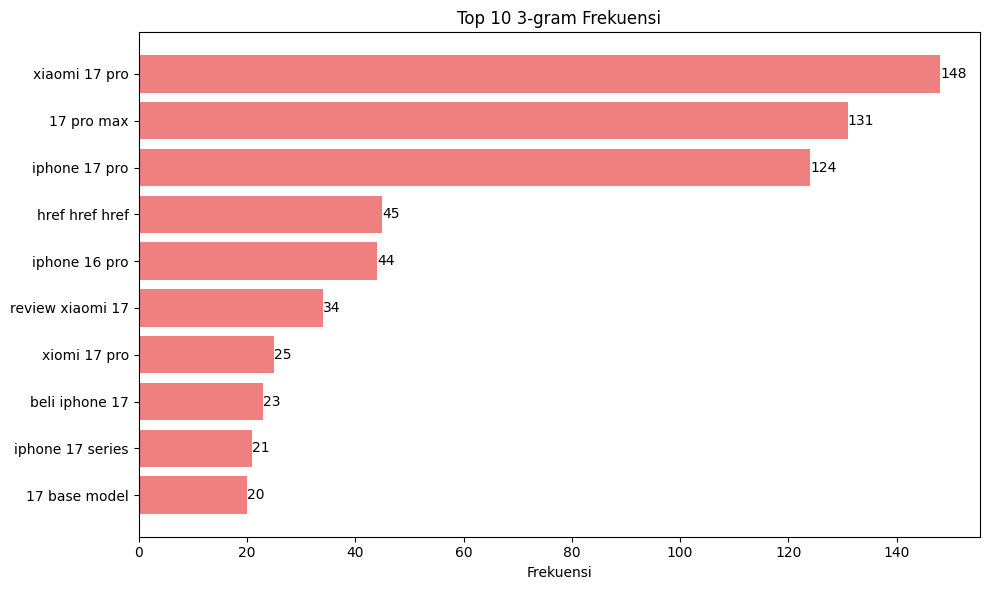

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

# N-gram Bar Chart
def plot_ngram_frequencies(texts, ngram_range=(3,3), top_n=10, color='skyblue'):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)

    ngram_counts = X.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    freq_dist = dict(zip(ngram_vocab, ngram_counts))

    # Take n-gram with the most common
    top_ngrams = Counter(freq_dist).most_common(top_n)
    labels, values = zip(*top_ngrams)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(labels[::-1], values[::-1], color=color)
    plt.title(f'Top {top_n} {ngram_range[0]}-gram Frekuensi')
    plt.xlabel('Frekuensi')

    # Add labels at the end of each bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

    plt.tight_layout()
    plt.show()

# Visualization 3-gram
plot_ngram_frequencies(df_final['normalization'], ngram_range=(3,3), top_n=10, color='lightcoral')

**WORDCLOUD AFTER PREPROCESSING**

---



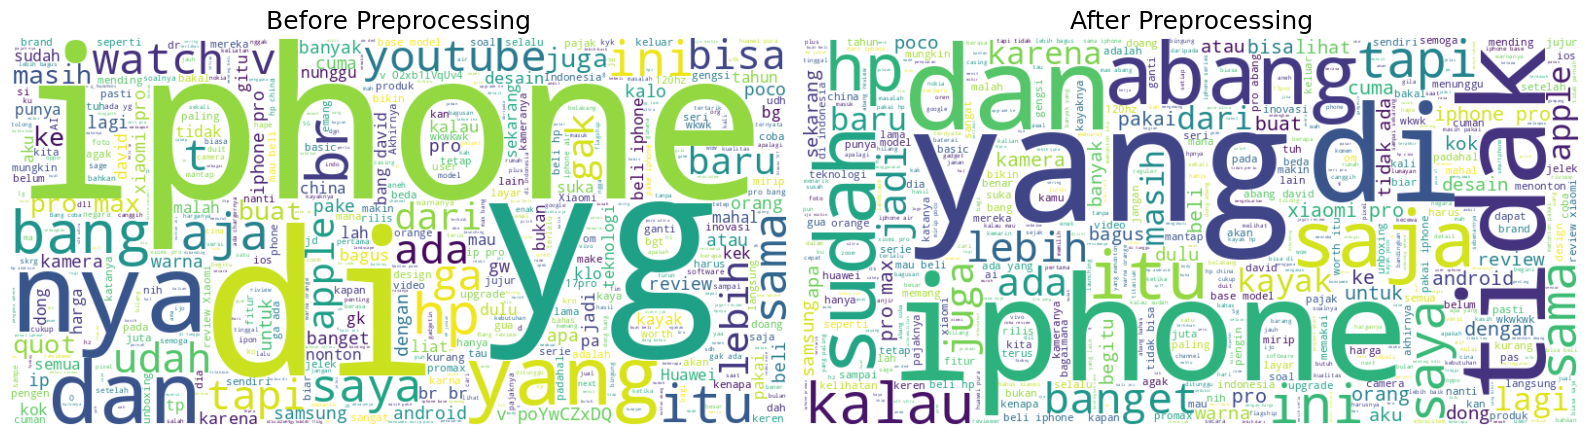

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Extra stopwords
stopwords = set(STOPWORDS)
stopwords.update(['href','https', 'co', 'RT', '...', 'amp','lu','deh','fyp', 'ya', 'gue', 'sih','update','apk'])

# WordCloud Before ('comment')
text_before = ' '.join(df_final['comment'].astype(str).tolist())
wc_before = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_before)

# WordCloud After ( 'steming')
text_after = ' '.join(df_final['normalization'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


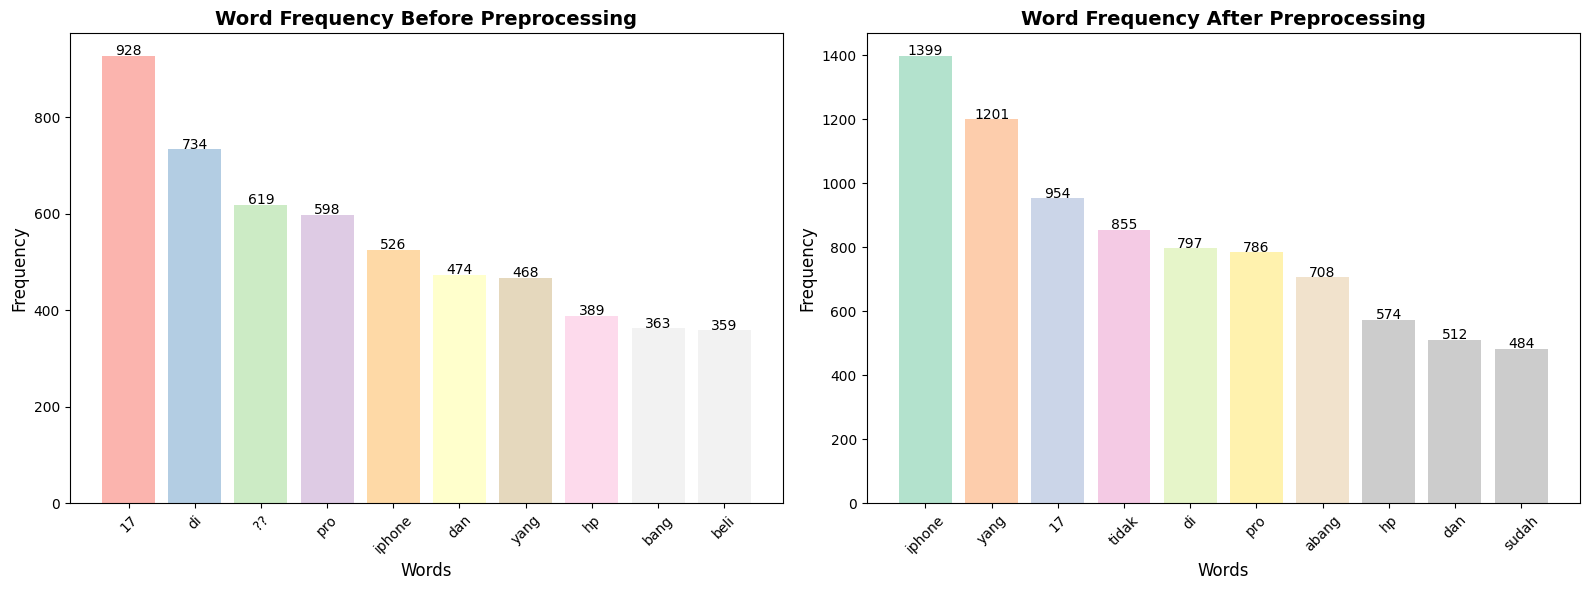

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Extra
stopwords = set(STOPWORDS)
stopwords.update(['href','https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
                  'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','update','apk','ajar'])

all_text_before = ' '.join(df_cleaned["comment"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

all_text_after = ' '.join(df_final["normalization"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Word Frequency Before Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Words", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Word Frequency After Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Words", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


/tmp/ipython-input-408149194.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_labels, y=sentiment_count.values, palette='pastel')


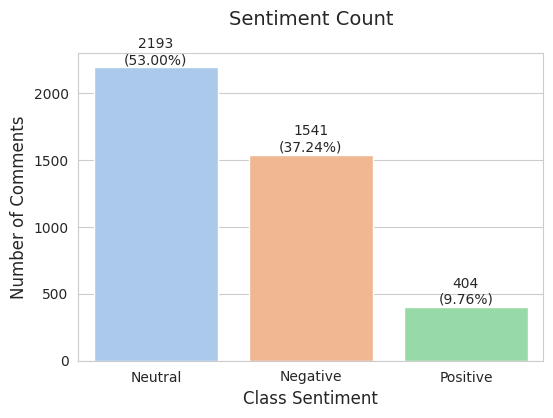

In [ ]:
import seaborn as sns
sentiment_count = df_final['label'].value_counts()
sns.set_style('whitegrid')
sentiment_names = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
sentiment_labels = [sentiment_names[i] for i in sentiment_count.index]

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_labels, y=sentiment_count.values, palette='pastel')
plt.title('Sentiment Count', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)

total = len(df_final['label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
df_final.to_csv('final_preprocessing.csv', index=False)